In [123]:

import matplotlib as mpl
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.signal import detrend
from matplotlib.backends.backend_pdf import PdfPages

In [124]:
path = "../data/Tokyo_Weather_2013-2023/Compiled_2013-2023_eng.csv"

df = pd.read_csv(path)

# 型確認
print(df.shape) 

# データの型を確認
print(df.dtypes)

(3652, 31)
Date                                                       object
SunshineDuration                                          float64
SunshineDurationNoPhenomenonInformation                      bool
MaximumSnowDepth                                          float64
MaximumSnowDepthNoPhenomenonInformation                      bool
AverageWindSpeed                                          float64
AverageVaporPressure                                      float64
AverageHumidity                                           float64
AverageSeaLevelPressure                                   float64
AverageGroundLevelPressure                                float64
AverageCloudCover                                         float64
AverageTemperature                                        float64
TotalSolarRadiation                                       float64
TotalPrecipitation                                        float64
TotalPrecipitationNoPhenomenonInformation                    bool

In [125]:
# 以下のカラムがすべて True かどうか確認
all_true_1 = df['SunshineDurationNoPhenomenonInformation'].all()

all_true_2 = df['MaximumSnowDepthNoPhenomenonInformation'].all()

all_true_3 = df['TotalPrecipitationNoPhenomenonInformation'].all()

all_true_4 = df['TotalSnowfallNoPhenomenonInformation'].all()

all_true_5 = df['LowestSeaLevelPressureNoPhenomenonInformation'].all()

all_true_6 = df['MaximumPrecipitationin10MinutesNoPhenomenonInformation'].all()

# 結果を出力
print(all_true_1, all_true_2, all_true_3, all_true_4, all_true_5, all_true_6)

# すべて True のカラムを削除
columns_to_drop = ['SunshineDurationNoPhenomenonInformation', 'MaximumSnowDepthNoPhenomenonInformation', 'TotalPrecipitationNoPhenomenonInformation', 'TotalSnowfallNoPhenomenonInformation', 'LowestSeaLevelPressureNoPhenomenonInformation', 'MaximumPrecipitationin10MinutesNoPhenomenonInformation']
df = df.drop(columns=columns_to_drop)

df_before = df

True True True True True True


In [126]:
# 各行に欠損値が含まれるかどうかを示すブール型のデータフレームを作成
rows_with_missing_values = df.isnull().any(axis=1)

# 欠損値が含まれる行を表示
rows_with_missing_values = df[rows_with_missing_values]
print("欠損値が含まれる行:")
print(rows_with_missing_values)

欠損値が含まれる行:
           Date  SunshineDuration  MaximumSnowDepth  AverageWindSpeed  \
3611   2023/9/9               NaN               0.0               2.2   
3612  2023/9/10               NaN               0.0               3.1   

      AverageVaporPressure  AverageHumidity  AverageSeaLevelPressure  \
3611                  29.0             93.0                   1009.6   
3612                  30.8             83.0                   1011.8   

      AverageGroundLevelPressure  AverageCloudCover  AverageTemperature  ...  \
3611                      1006.8                7.5                24.8  ...   
3612                      1009.1                6.3                27.8  ...   

      MostFrequentWindDirection  MaximumWindSpeed  \
3611                          南               5.4   
3612                          南               5.9   

      MaximumWindSpeedWindDirection  LowestSeaLevelPressure  \
3611                              南                  1008.2   
3612                     

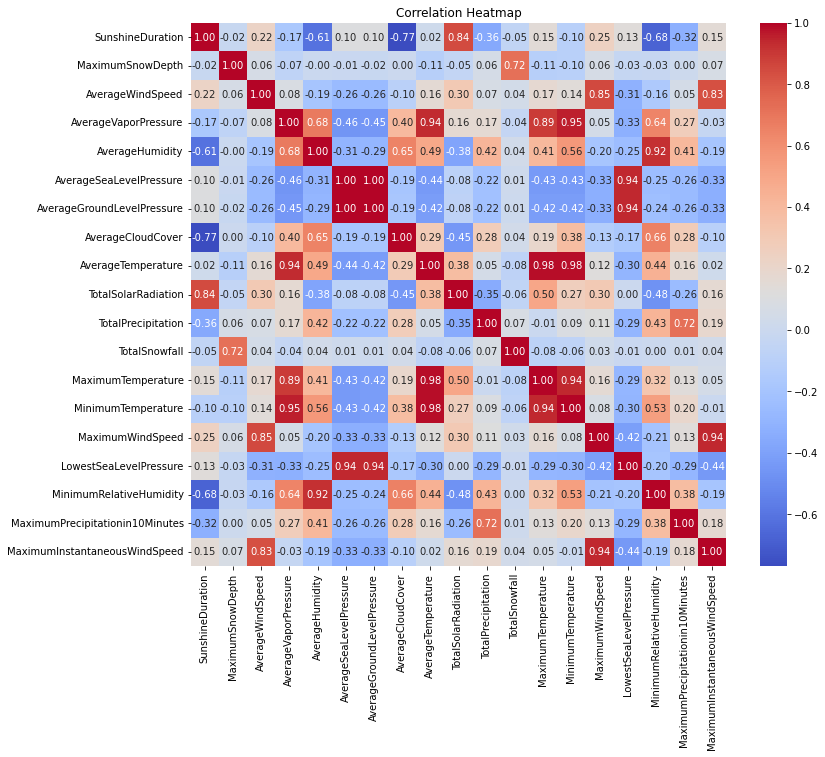

In [127]:
# 欠損値を確認すると、'SunshineDuration'の2023/9/9、2023/9/10の2行が欠損。

# 相関行列の計算
correlation_matrix = df.corr()

# ヒートマップの作成
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

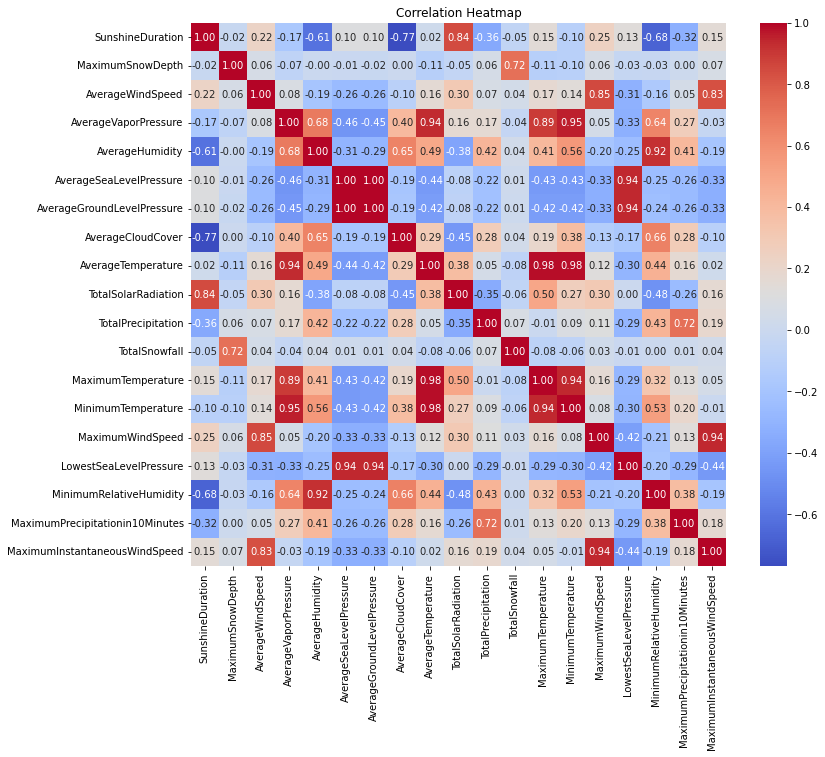

In [128]:
# ヒートマップの作成
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 欠損地を、Heat-Mapより相関の高い変数('AverageCloudCover', 'TotalSolarRadiation')を説明変数として重回帰分析を行い補完。

# 必要な列だけを抽出
data = df_before[['SunshineDuration', 'AverageCloudCover', 'TotalSolarRadiation']]

# 欠損値が含まれる行を除外
data = data.dropna(subset=['SunshineDuration', 'AverageCloudCover', 'TotalSolarRadiation'])

# 訓練データとテストデータに分割
X = data[['AverageCloudCover', 'TotalSolarRadiation']]
y = data['SunshineDuration']

# モデルの構築
model = LinearRegression()
model.fit(X, y)

# 欠損値が含まれる行のインデックスを取得
rows_with_missing_values = df[df['SunshineDuration'].isnull()].index

# 欠損値を補完
for row_index in rows_with_missing_values:
    # 説明変数の値を取得
    input_data = df.loc[row_index, ['AverageCloudCover', 'TotalSolarRadiation']].values.reshape(1, -1)
    
    # SunshineDurationの欠損を補完
    df.at[row_index, 'SunshineDuration'] = model.predict(input_data)


In [129]:
# 上記で欠損値が補完されたことを確認

# 各行に欠損値が含まれるかどうかを示すブール型のデータフレームを作成
rows_with_missing_values = df_before.isnull().any(axis=1)

# 欠損値が含まれる行を表示
rows_with_missing_values = df_before[rows_with_missing_values]
print("欠損値が含まれる行:")
print(rows_with_missing_values)

欠損値が含まれる行:
Empty DataFrame
Columns: [Date, SunshineDuration, MaximumSnowDepth, AverageWindSpeed, AverageVaporPressure, AverageHumidity, AverageSeaLevelPressure, AverageGroundLevelPressure, AverageCloudCover, AverageTemperature, TotalSolarRadiation, TotalPrecipitation, TotalSnowfall, MaximumTemperature, MinimumTemperature, MostFrequentWindDirection, MaximumWindSpeed, MaximumWindSpeedWindDirection, LowestSeaLevelPressure, MinimumRelativeHumidity, MaximumPrecipitationin10Minutes, MaximumInstantaneousWindSpeed, MaximumInstantaneousWindSpeedWindDirection, WeatherSummaryDay, WeatherSummaryNight]
Index: []

[0 rows x 25 columns]


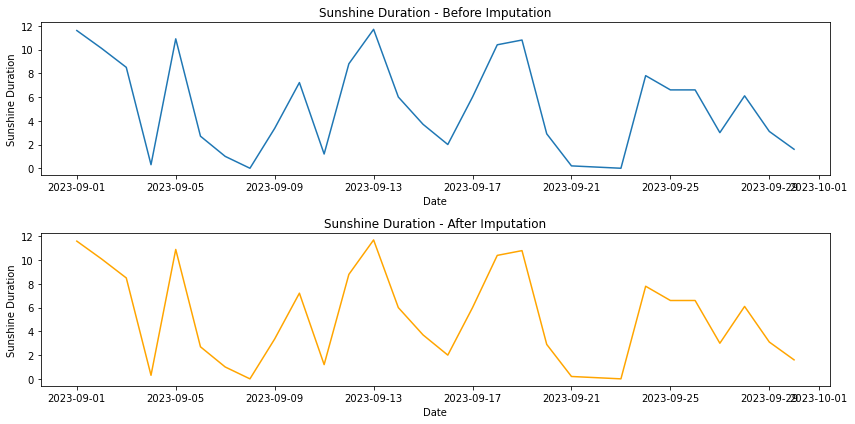

In [139]:
df_after = df

# データ補完の様子をplot

# 補完前のデータ
df_before['Date'] = pd.to_datetime(df_before['Date'])

# 補完後のデータ
df_after['Date'] = pd.to_datetime(df_after['Date'])

# 2023年9月のデータを抽出
df_before_sep = df_before[(df_before['Date'] >= '2023-09-01') & (df_before['Date'] <= '2023-09-30')]
df_after_sep = df_after[(df_after['Date'] >= '2023-09-01') & (df_after['Date'] <= '2023-09-30')]

# プロット
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df_before_sep['Date'], df_before_sep['SunshineDuration'])
plt.title('Sunshine Duration - Before Imputation')
plt.xlabel('Date')
plt.ylabel('Sunshine Duration')

plt.subplot(2, 1, 2)
plt.plot(df_after_sep['Date'], df_after_sep['SunshineDuration'], color='orange')
plt.title('Sunshine Duration - After Imputation')
plt.xlabel('Date')
plt.ylabel('Sunshine Duration')

plt.tight_layout()
plt.show()

In [131]:
# ['MostFrequentWindDirection', 'MaximumWindSpeedWindDirection', 'MaximumInstantaneousWindSpeedWindDirection']のデータの種類を確認。
unique_values = df_after['MostFrequentWindDirection'].unique()
print(unique_values)

unique_values = df_after['MaximumWindSpeedWindDirection'].unique()
print(unique_values)

unique_values = df_after['MaximumInstantaneousWindSpeedWindDirection'].unique()
print(unique_values)

['北北西' '東北東' '北北東' '北' '北西' '南南東' '南南西' '南' '西北西' '南西' '北東' '東' '南東' '東南東'
 '西南西' '西']
['北' '東北東' '北東' '北北西' '北西' '西北西' '南' '南南西' '南西' '南南東' '南東' '東南東' '北北東' '東'
 '南南西]' '南南西)' '北北西)' '西南西' '南南東)' '南東)' '北西)' '西' '南]' '南南東]' '北北東)' '南)'
 '北東)']
['北' '北東' '北北東' '北北西' '北西' '南南東' '南南西' '南西' '南' '南東' '西北西' '西' '東' '東北東'
 '東南東' '南西]' '南南西)' '北北西)' '西南西' '北北東)' '南東)' '南)' '北西)' '南]' '南南西]' '北東)'
 '西北西)' '南南東)' '北)' '西南西)']


In [132]:
# ]や）などの余計な記号が付いているデータがあったので以下で余計な記号を削除。

# 不要な文字を削除する関数
def remove_unwanted_chars(value):
    unwanted_chars = set([')', ']'])
    return ''.join(char for char in value if char not in unwanted_chars)

# カテゴリカル変数を持つカラムを指定
wind_direction_columns = ['MostFrequentWindDirection', 'MaximumWindSpeedWindDirection', 'MaximumInstantaneousWindSpeedWindDirection']

# 不要な文字を削除
df[wind_direction_columns] = df_after[wind_direction_columns].applymap(remove_unwanted_chars)

# 以下でカテゴリカル変数を数字に変換。

wind_directions = ['北', '北北東', '北東', '東北東', '東', '東南東', '南東', '南南東', '南', '南南西', '南西', '西南西', '西', '西北西', '北西', '北北西']

# カテゴリカル変数を持つカラムを指定
wind_direction_columns = ['MostFrequentWindDirection', 'MaximumWindSpeedWindDirection', 'MaximumInstantaneousWindSpeedWindDirection']

# カテゴリを順序に対応する整数に変換
df_after[wind_direction_columns] = df_after[wind_direction_columns].apply(lambda col: col.map({direction: idx for idx, direction in enumerate(wind_directions)}))

# LabelEncoderの適用
label_encoder = LabelEncoder()
df_after[wind_direction_columns] = df_after[wind_direction_columns].apply(label_encoder.fit_transform)

# 上記で欠損値が発生していないかを以下で確認。

# 各行に欠損値が含まれるかどうかを示すブール型のデータフレームを作成
rows_with_missing_values = df_after.isnull().any(axis=1)

# 欠損値が含まれる行を表示
rows_with_missing_values = df_after[rows_with_missing_values]
print("欠損値が含まれる行:")
print(rows_with_missing_values)


欠損値が含まれる行:
Empty DataFrame
Columns: [Date, SunshineDuration, MaximumSnowDepth, AverageWindSpeed, AverageVaporPressure, AverageHumidity, AverageSeaLevelPressure, AverageGroundLevelPressure, AverageCloudCover, AverageTemperature, TotalSolarRadiation, TotalPrecipitation, TotalSnowfall, MaximumTemperature, MinimumTemperature, MostFrequentWindDirection, MaximumWindSpeed, MaximumWindSpeedWindDirection, LowestSeaLevelPressure, MinimumRelativeHumidity, MaximumPrecipitationin10Minutes, MaximumInstantaneousWindSpeed, MaximumInstantaneousWindSpeedWindDirection, WeatherSummaryDay, WeatherSummaryNight]
Index: []

[0 rows x 25 columns]


In [133]:
# unique_valuesに含まれるそれぞれの要素に対して行数を数える関数
def count_rows_by_value(column, value):
    count = len(df[df[column] == value])
    return count

# WeatherSummaryDay に対して処理
unique_values_WeatherSummaryDay = df_after['WeatherSummaryDay'].unique()

# 各要素の行数を辞書に格納
count_dict = {value: count_rows_by_value('WeatherSummaryDay', value) for value in unique_values_WeatherSummaryDay}

# 行数が多い順にソート
sorted_counts = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)


# WeatherSummaryNight に対して処理
unique_values_WeatherSummaryNight = df_after['WeatherSummaryNight'].unique()

# 各要素の行数を辞書に格納
count_dict = {value: count_rows_by_value('WeatherSummaryNight', value) for value in unique_values_WeatherSummaryNight}

# 行数が多い順にソート
sorted_counts2 = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)

In [134]:
sorted_counts
sorted_counts2

[('快晴', 464),
 ('曇', 346),
 ('晴', 301),
 ('曇時々晴', 174),
 ('晴一時曇', 168),
 ('曇時々雨', 164),
 ('晴時々曇', 139),
 ('雨時々曇', 138),
 ('曇一時晴', 136),
 ('曇一時雨', 110),
 ('薄曇', 87),
 ('雨', 84),
 ('晴後曇', 80),
 ('晴時々薄曇', 68),
 ('薄曇時々晴', 60),
 ('曇後晴', 59),
 ('雨一時曇', 59),
 ('晴後一時曇', 58),
 ('晴一時薄曇', 58),
 ('曇後雨', 53),
 ('曇後一時雨', 50),
 ('晴後一時薄曇', 46),
 ('薄曇後晴', 45),
 ('曇後一時晴', 45),
 ('薄曇一時晴', 39),
 ('晴後薄曇', 37),
 ('晴後時々曇', 33),
 ('曇後時々雨', 32),
 ('大雨', 28),
 ('雨後曇', 23),
 ('晴一時雨', 22),
 ('雨後一時曇', 21),
 ('曇時々晴一時雨', 20),
 ('曇後時々晴', 18),
 ('曇時々雨、雷を伴う', 18),
 ('雨後時々曇', 17),
 ('曇一時雨後晴', 16),
 ('曇時々雨一時晴', 15),
 ('晴時々曇一時雨', 13),
 ('曇時々雨後一時晴', 12),
 ('曇一時雨、雷を伴う', 11),
 ('薄曇後一時晴', 11),
 ('雨一時曇後晴', 9),
 ('雨時々曇、雷を伴う', 9),
 ('晴後曇一時雨', 9),
 ('曇時々雨後晴', 9),
 ('雨時々曇後晴', 9),
 ('晴後時々薄曇', 9),
 ('曇時々晴後一時雨', 8),
 ('薄曇後一時雨', 7),
 ('曇一時晴後時々雨', 7),
 ('雨後曇一時晴', 7),
 ('雨後晴一時曇', 7),
 ('雨後晴', 6),
 ('曇一時雨後時々晴', 6),
 ('晴時々曇一時雨、雷を伴う', 5),
 ('晴後曇時々雨', 5),
 ('曇後一時雨、雷を伴う', 5),
 ('曇後一時雪', 4),
 ('曇一時雨後晴、雷を伴う', 4),
 ('雨時々曇後一時晴', 4),
 ('雨後一時晴', 4

In [135]:
# WeatherSummaryDay にはあるが、WeatherSummaryNight には存在しない値を取得
missing_in_day = set(unique_values_WeatherSummaryDay) - set(unique_values_WeatherSummaryNight)

# 結果を表示
print("存在するが、WeatherSummaryNight には存在しない値:", missing_in_day)
print(len(missing_in_day))


# WeatherSummaryDay にはあるが、WeatherSummaryNight には存在しない値を取得
missing_in_night = set(unique_values_WeatherSummaryNight) - set(unique_values_WeatherSummaryDay)

# 結果を表示
print("存在するが、WeatherSummaryNight には存在しない値:", missing_in_night)
print(len(missing_in_night))

存在するが、WeatherSummaryNight には存在しない値: {'晴後一時雨、雷・ひょうを伴う', '曇時々晴後一時雨、雷を伴う', '曇時々雨後晴、雷を伴う', '大雨時々曇、雷を伴う', '晴一時曇後雨', '雪後みぞれ時々曇', '雨時々曇一時雪', '曇後大雨、雷を伴う', '曇一時雨後一時晴、雷を伴う', '曇後一時大雨、雷を伴う', '晴後雨時々曇、雷を伴う', '曇時々晴、あられを伴う', '雨後曇、あられを伴う', '雨後みぞれ', '大雨後時々曇一時晴', '晴後時々曇一時雨', '大雨時々曇後一時晴', '雨後みぞれ一時雪', '大雨後時々晴、みぞれを伴う', '曇時々晴一時雪', '薄曇時々雨一時晴', '大雨後薄曇一時晴', '大雨後晴', '雨一時みぞれ', '曇後晴一時雨、雷・ひょうを伴う', '晴時々曇一時雪', '雪後一時曇', '曇一時晴、霧を伴う', '雪一時みぞれ後雨', '雨後雪時々みぞれ', '雨時々曇一時みぞれ、ひょうを伴う', '大雨後晴時々曇', '雨後薄曇一時晴', '霧雨後曇一時雨', '曇時々雨後一時晴、雷を伴う', '曇一時雪、あられを伴う', '曇後一時雨後晴', '雪', '薄曇時々晴一時雨、雷を伴う', '晴時々曇、みぞれを伴う', '薄曇時々雨後一時晴', '晴、雷を伴う', '曇時々大雨、雷を伴う', '雨時々雪後一時曇、みぞれを伴う', '晴時々曇後一時雨、雷を伴う', 'みぞれ時々雨', '晴後一時みぞれ、あられを伴う', '曇時々晴後一時雨、みぞれを伴う', '雨後薄曇', '曇後雨一時晴', 'みぞれ一時雪、あられを伴う', '薄曇後時々雨、雷を伴う', '曇時々雨、みぞれを伴う', '晴後一時雨、雷を伴う', '雨、みぞれを伴う', '雨時々晴一時霧雨', '曇時々晴一時雨、雷・ひょうを伴う', 'みぞれ一時曇後晴', '曇時々大雨', '雨一時晴', '曇後雨一時みぞれ', '晴一時曇後一時雨、雷を伴う', '曇時々雪後雨', '曇時々みぞれ一時雨', '晴時々雨、雷を伴う', '雨一時みぞれ後時々曇', 'みぞれ一時雨後一時雪', '大雪', '曇一時晴後雨、雷を伴う', '曇時々晴後時々雨', '晴後曇一時雨、雷を伴う', '晴時々雨一時曇、雷を伴う', '雪後曇', '雨時

In [136]:
# 天気をカテゴリにまとめる関数    
def categorize_weather(weather):
    if '雪' in weather:
        return 3
    elif '雨' in weather:
        return 2
    elif '曇' in weather:
        return 1
    elif '晴' in weather or '快晴' in weather:
        return 0
    else:
        return -1

# 天気をカテゴリにまとめる
df_after['WeatherSummaryDay'] = df_after['WeatherSummaryDay'].apply(categorize_weather)

# カテゴリごとの数を集計
weather_day_counts = df_after['WeatherSummaryDay'].value_counts()

# 夜間の天気をカテゴリにまとめる
df_after['WeatherSummaryNight'] = df_after['WeatherSummaryNight'].apply(categorize_weather)

# カテゴリごとの数を集計
weather_night_counts = df_after['WeatherSummaryNight'].value_counts()

# 結果の表示
print(weather_day_counts)
print(weather_night_counts)

1    1663
2    1085
0     876
3      28
Name: WeatherSummaryDay, dtype: int64
1    1729
2    1138
0     766
3      19
Name: WeatherSummaryNight, dtype: int64


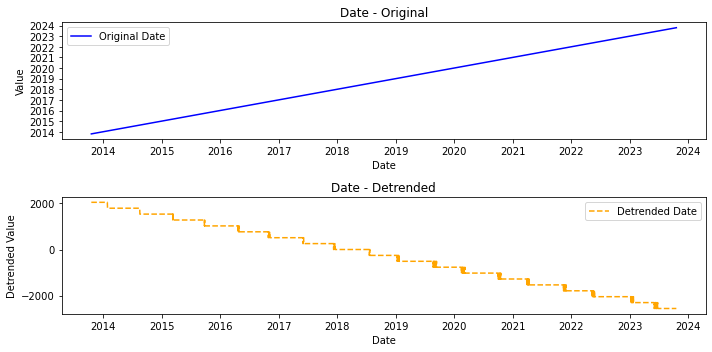

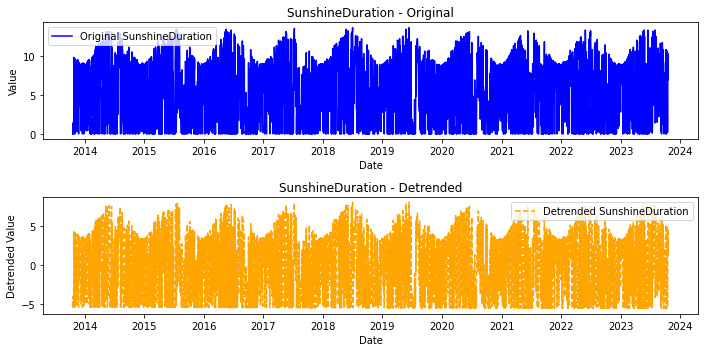

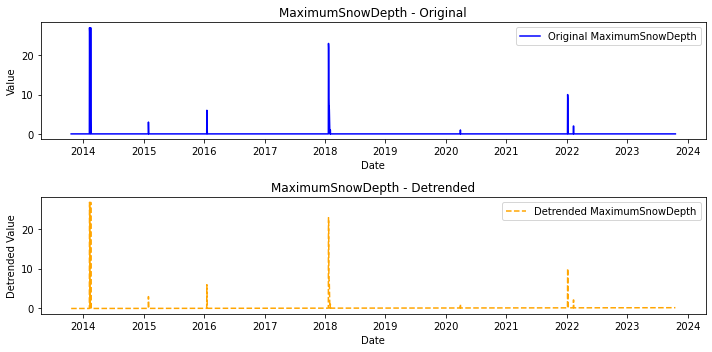

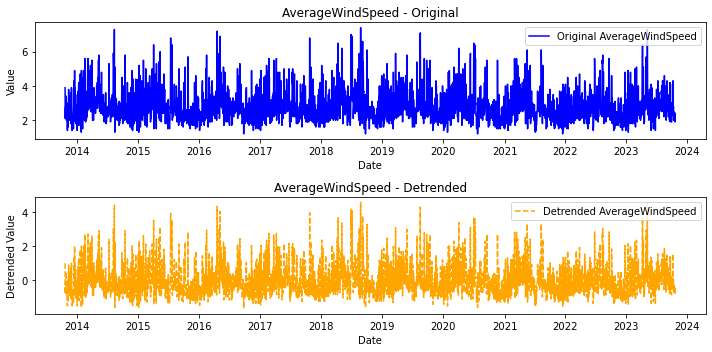

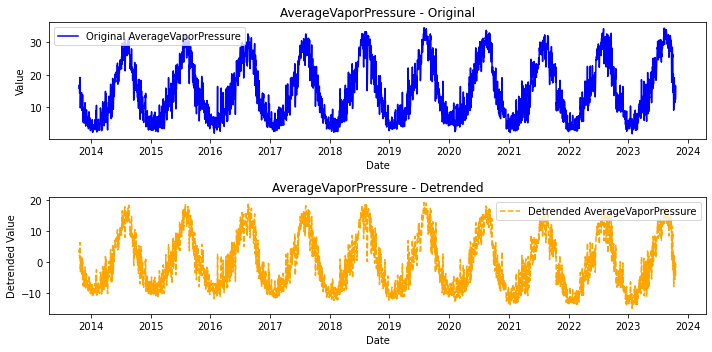

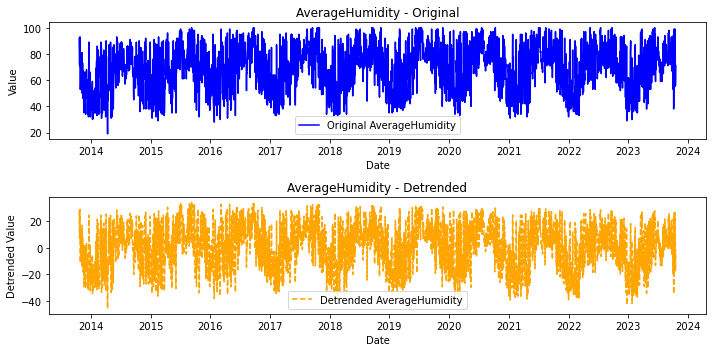

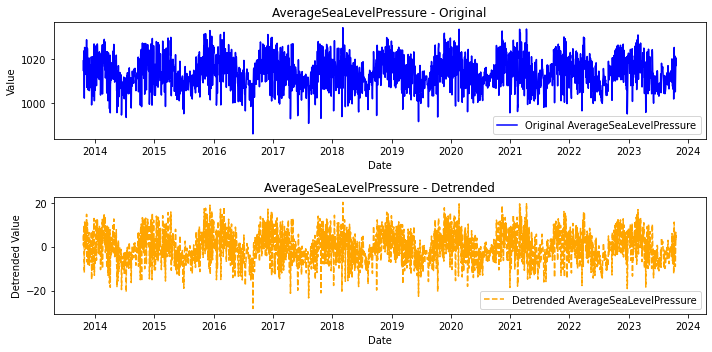

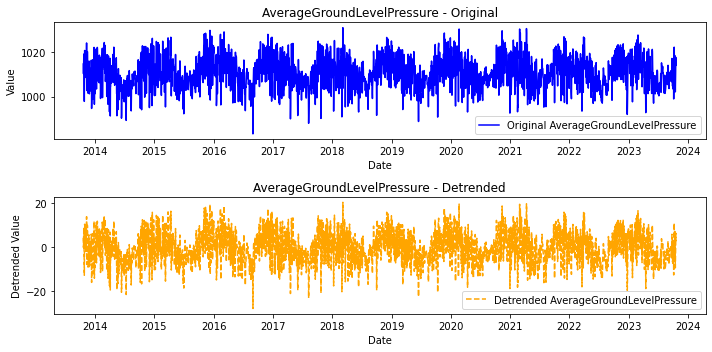

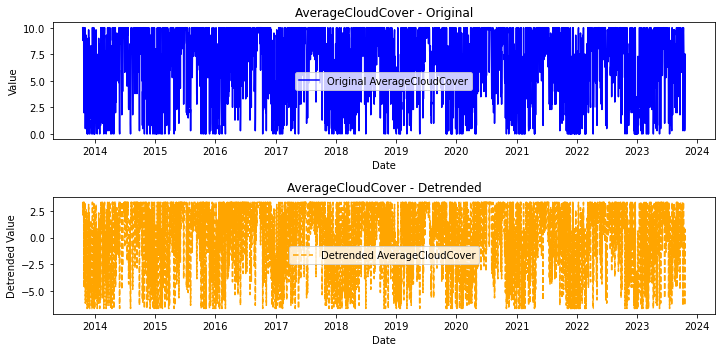

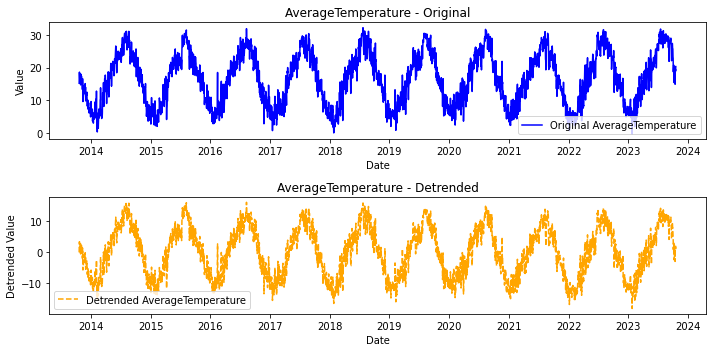

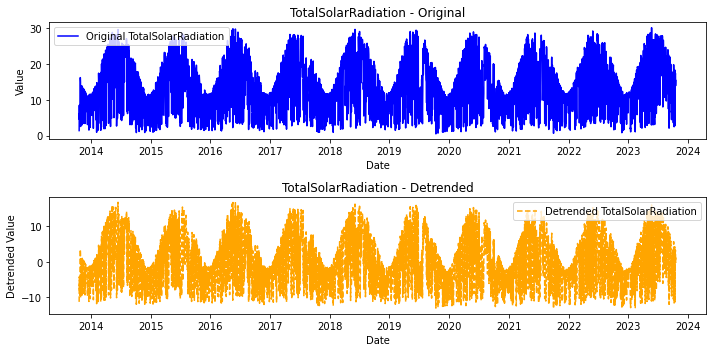

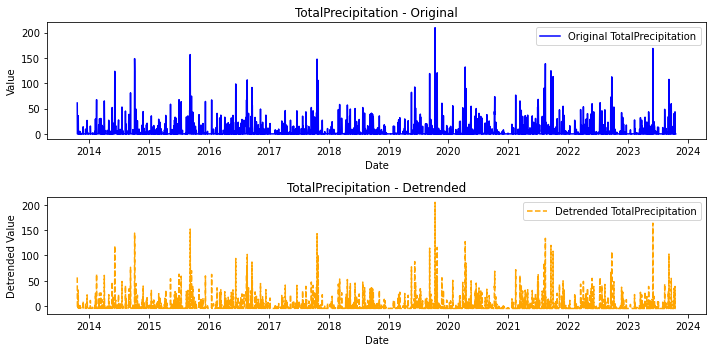

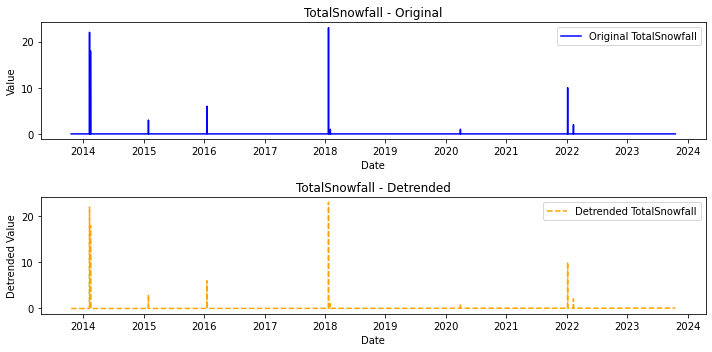

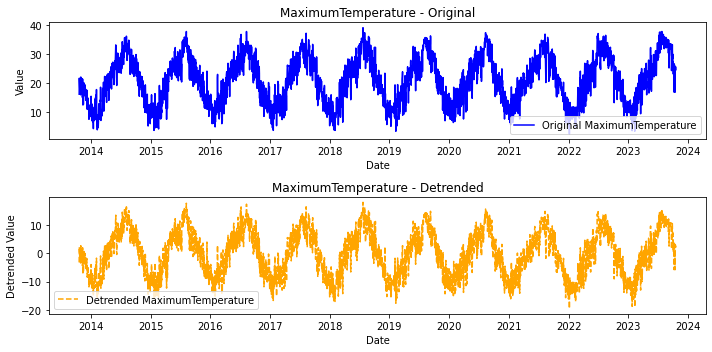

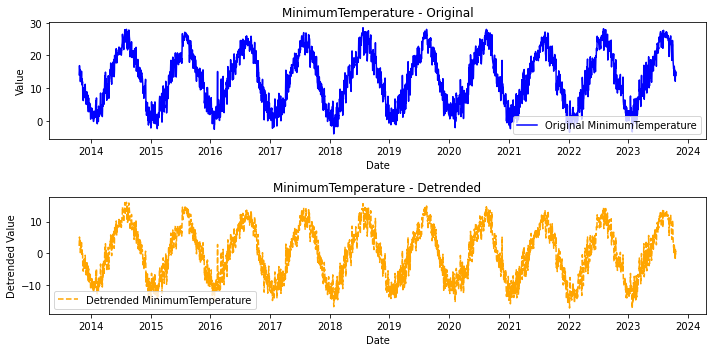

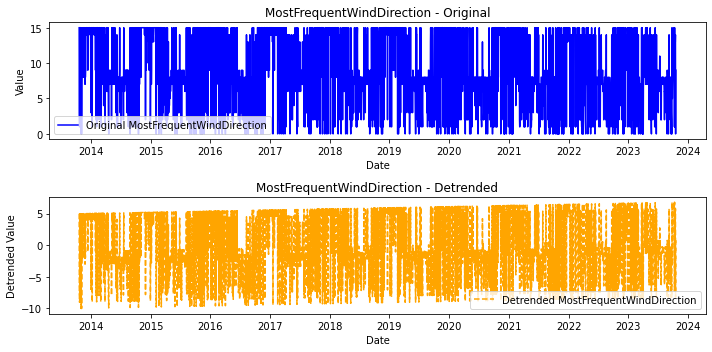

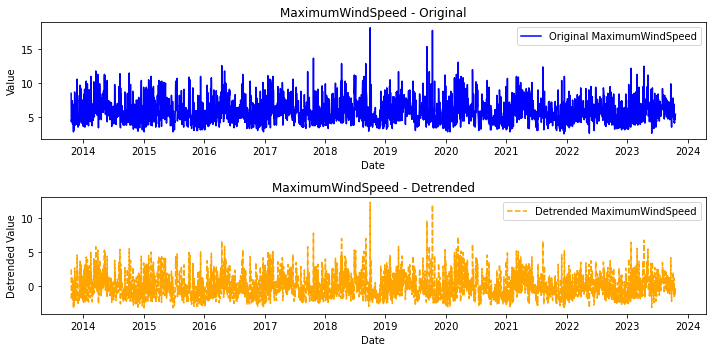

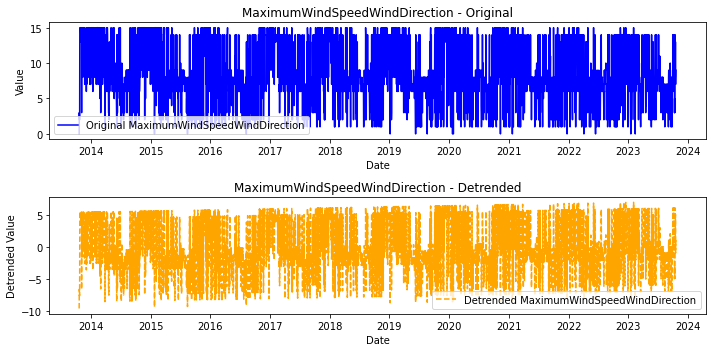

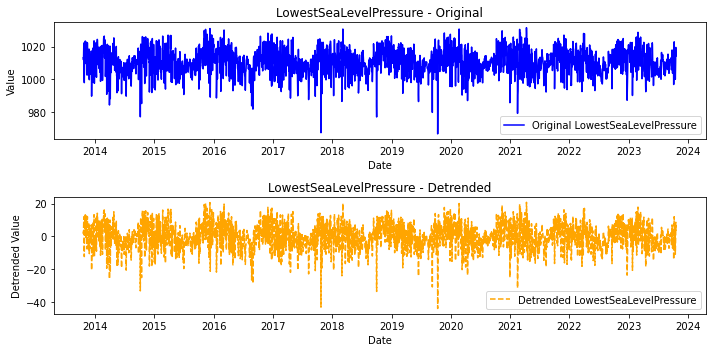

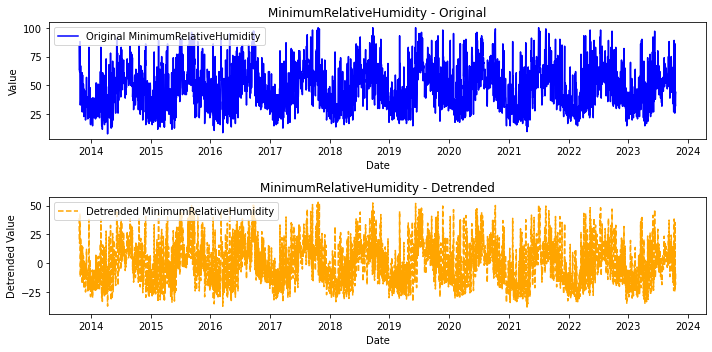

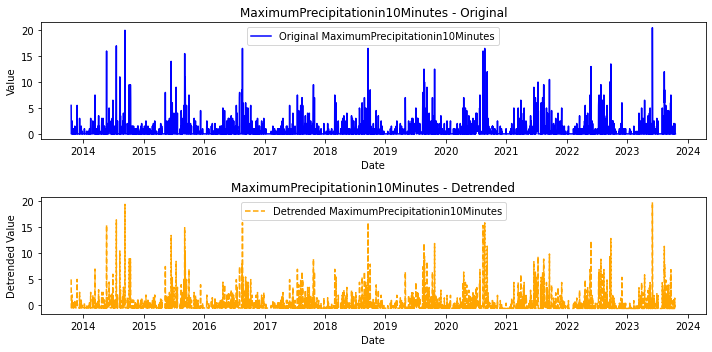

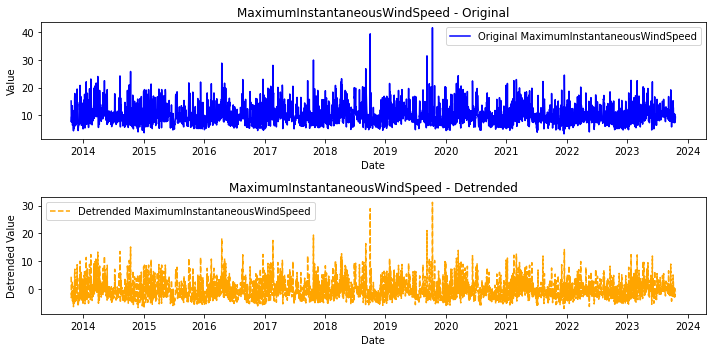

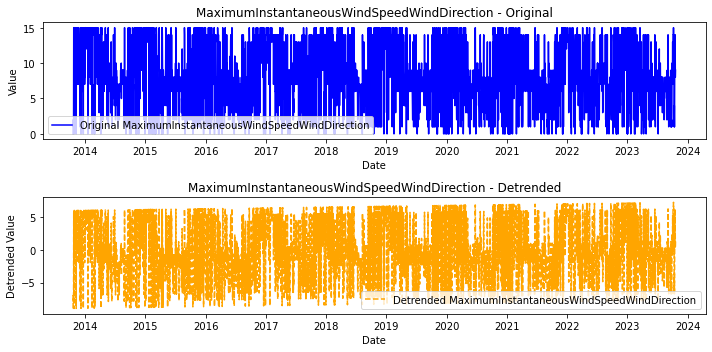

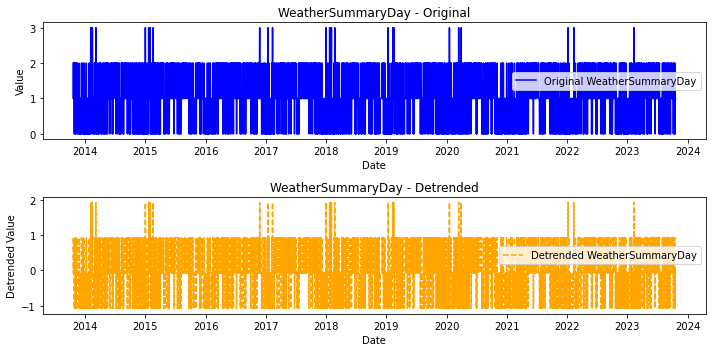

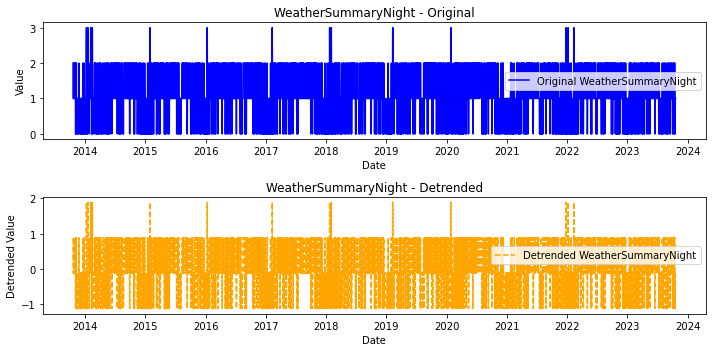

In [137]:
# 各カラム毎の可視化と季節性の除去

# 日付をdatetime型に変換
df_after['Date'] = pd.to_datetime(df_after['Date'])

# データのトレンドを削除する関数
def detrend_column(column):
    return detrend(column.values)

# グラフごとに表示
for column in df_after.columns:
    plt.figure(figsize=(10, 5))
    
    # オリジナルデータのプロット
    plt.subplot(2, 1, 1)
    plt.plot(df_after['Date'], df_after[column], label=f'Original {column}', color='blue')  # 1つ目の変数は青色
    plt.title(f'{column} - Original')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()

    # 季節性を除去したデータのプロット
    plt.subplot(2, 1, 2)
    detrended_data = detrend_column(df_after[column])
    plt.plot(df_after['Date'], detrended_data, label=f'Detrended {column}', linestyle='--', color='orange')  # 2つ目の変数はオレンジ色
    plt.title(f'{column} - Detrended')
    plt.xlabel('Date')
    plt.ylabel('Detrended Value')
    plt.legend()

    # グラフ間のスペース調整
    plt.tight_layout()

    # グラフを表示
    plt.show()


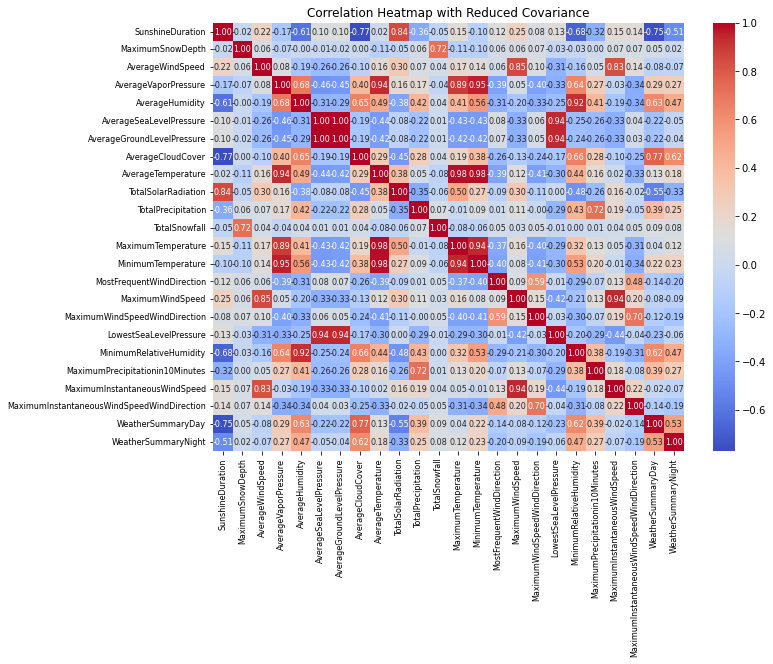

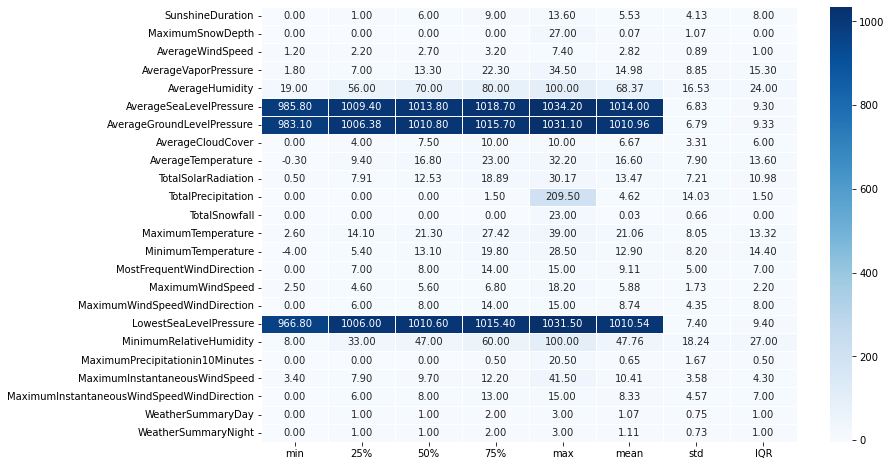

In [138]:
# 相関行列の計算
correlation_matrix = df_after.corr()

# ヒートマップの作成し直し
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Heatmap with Reduced Covariance')
plt.tight_layout()

# フォントサイズの変更
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=8)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, fontsize=8)

plt.show()

# 統計情報の取得
statistics_df = df_after.describe().transpose()

# 四分位範囲の計算
statistics_df['IQR'] = statistics_df['75%'] - statistics_df['25%']

# 画像のサイズを設定
plt.figure(figsize=(12, 8))

# ヒートマップの作成
sns.heatmap(statistics_df[['min', '25%', '50%', '75%', 'max', 'mean', 'std', 'IQR']], annot=True, cmap='Blues', fmt=".2f", linewidths=.5)

# 画像の表示
plt.show()
